# MacGyver Literature Search
This is a fairly cursory literature search using SciXplorer to get a sense of the MacGyver Sessions in AGU Fall Meeting to date.

## Step 1: Initial Data Set
First, I used SciXplorer to generate a .bib file.
![image.png](attachment:a5c1a8a4-9b4e-473d-bab0-5d755ac84645.png)


Sign up for an ADS token and save it to a local text file called "ADS_DEV_KEY.txt." We next save it as an evironment variable here: 

In [1]:
import os
with open('ADS_DEV_KEY.txt', 'r') as f:
    os.environ["ADS_DEV_KEY"] =  f.read()
# os.environ.get("ADS_DEV_KEY") % check: prints environment variable.

Optionally, we can check the limits of the ADS token we're using. (from https://github.com/fmonteneucm/ADS-API-fmontene/blob/main/ADS_mining.ipynb). 

In [2]:
import ads
ADS_DEV_KEY = os.environ.get("ADS_DEV_KEY")
ads.config.token = ADS_DEV_KEY

def get_ads_query_limits():
    # There is a limited number of queries allowed per ADS API token.
    # This function makes a dummy query asking for this information
    r = ads.RateLimits('SearchQuery')
    q = ads.SearchQuery(q='machine-learning')
    print(r.limits)

get_ads_query_limits()

{}


## Literature Search: Meetings
In the next cell, we run the query for all AGU Fall Meeting abstracts with relevant keywords. Running this cell will deplete your ADS queries for 24 hours, so it's in Raw format to keep it from being run accidentally. Convert the cell to Code if you would like to run it and populate your references.bib file.

In [3]:
# foo = fetch_datacite_papers("*AGUFM*")


In [4]:
# def paper_to_bibtex(paper):
#     """Converts a DataCite paper dictionary to a BibTeX entry."""
#     attributes = paper.get("attributes", {})
#     bibtex_entry = {
#         "ENTRYTYPE": "article",
#         "ID": paper.get("id", "").replace("/", "_"),
#         "title": attributes.get("titles", [{"title": ""}])[0].get("title", ""),
#         "DOI": paper.get("id", ""),
#         "year": str(attributes.get("publicationYear", "")),
#         "publisher": attributes.get("publisher", ""),
#         "author": [],
#     }

#     if "creators" in attributes and isinstance(attributes["creators"], list):
#         for creator in attributes["creators"]:
#             family_name = creator.get('familyName', '')
#             given_name = creator.get('givenName', '')
#             if family_name or given_name:
#                 bibtex_entry["author"].append(f"{family_name}, {given_name}")

#     db = bibtexparser.bibdatabase.BibDatabase() # initialize the bibdatabase
#     db.entries = [bibtex_entry] # add the entry to the database
#     return bibtexparser.dumps(db) # dump the database.

In [5]:
    # output_filename = "agu_vr_pubs.bib"
    # with open(output_filename, 'w') as bibfile:
    #     for paper in papers:
    #         bibtex_str = paper_to_bibtex(paper)
    #         bibfile.write(bibtex_str + "\n\n")
    #         print(paper.get("id")) #print the DOI of each entry to the console.

## Read bibliography into pandas dataframe
Once references.bib has been populated, we can use this cell to read it into a pandas dataframe for our plots.

In [6]:
import pandas as pd
import bibtexparser

# Read the .bib file
with open('macgyver.bib', 'r') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

# Convert to DataFrame
df = pd.DataFrame(bib_database.entries)

# Data handling:
df['Year'] = pd.to_numeric(df['year']) # Cast to numeric 

# Filter to just Fall Meeting abstracts:
df = df[df.booktitle == "AGU Fall Meeting Abstracts"]

df["Section Code"] = df["eid"].str.slice(0, 2).apply(lambda x: ''.join(y for y in x if not y.isdigit()))
lookup_df = pd.read_csv("AGU Sections.csv")
lookup_dict = lookup_df.set_index('Section Code')['Section'].to_dict()
# Map the values using the dictionary
df['Section'] = df["Section Code"].map(lookup_dict)
df = df.sort_values(by='Section')
df=df.drop_duplicates()
print(df.shape)
df.head()


(188, 17)


,adsnote,adsurl,pages,eid,month,volume,series,year,booktitle,keywords,title,author,ENTRYTYPE,ID,Year,Section Code,Section
104,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2021AGUFM.H4...,H45T-1431,H45T-1431,December,2021,AGU Fall Meeting Abstracts,2021,AGU Fall Meeting Abstracts,NaN,{Sensing under stress: resource constrained op...,"{Weijs}, Steven",inproceedings,2021AGUFM.H45T1431W,2021,H,Hydrology
132,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2019AGUFM.H5...,H53S-2093,H53S-2093,December,2019,AGU Fall Meeting Abstracts,2019,AGU Fall Meeting Abstracts,9805 Instruments useful in three or more field...,{Intervalometer (Slight Return)},"{Van De Giesen}, N. and {de Villiers}, D. and ...",inproceedings,2019AGUFM.H53S2093V,2019,H,Hydrology
133,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2019AGUFM.H5...,H53S-2083,H53S-2083,December,2019,AGU Fall Meeting Abstracts,2019,AGU Fall Meeting Abstracts,9805 Instruments useful in three or more field...,{Using Real-time Sensing of Surrogate Water Qu...,"{Rimer}, S. and {Ahmad}, R. and {Murphy}, J. a...",inproceedings,2019AGUFM.H53S2083R,2019,H,Hydrology
134,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2019AGUFM.H5...,H53S-2085,H53S-2085,December,2019,AGU Fall Meeting Abstracts,2019,AGU Fall Meeting Abstracts,9805 Instruments useful in three or more field...,{Assessment of uncertainty of flow velocity by...,"{Tebakari}, T. and {Arai}, S. and {Kitsuda}, T.",inproceedings,2019AGUFM.H53S2085T,2019,H,Hydrology
135,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2019AGUFM.H5...,H53S-2089,H53S-2089,December,2019,AGU Fall Meeting Abstracts,2019,AGU Fall Meeting Abstracts,9805 Instruments useful in three or more field...,{Exploring Robot Communication Methods for Geo...,"{de Resende Filho}, L.~W. and {Sobreira}, S.~G...",inproceedings,2019AGUFM.H53S2089D,2019,H,Hydrology


# Bar Chart Visualization
I'd like to have the abstract titles be included in the hypergram. Let's see if we can make that happen.

In [7]:
df.columns


Index(['adsnote', 'adsurl', 'pages', 'eid', 'month', 'volume', 'series',
       'year', 'booktitle', 'keywords', 'title', 'author', 'ENTRYTYPE', 'ID',
       'Year', 'Section Code', 'Section'],
      dtype='object')

In [8]:
df.adsurl[4]

'https://ui.adsabs.harvard.edu/abs/2020AGUFMSM044..01F'

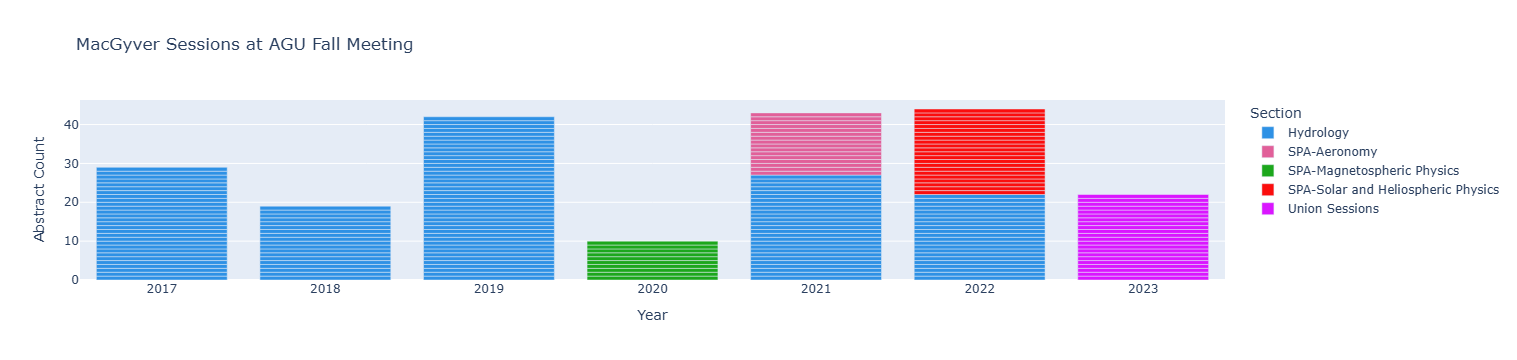

In [9]:
# AGU Fall Meeting 

import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


titlestring = "MacGyver Sessions at AGU Fall Meeting"
# data
# Read the .bib file
with open('macgyver.bib', 'r') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

# Convert to DataFrame
df = pd.DataFrame(bib_database.entries)

# Data handling:
df['Year'] = pd.to_numeric(df['year']) # Cast to numeric 
df['Abstract Count'] = 1 # for bar chart purposes
# Remove curly braces using str.replace()
df['title'] = df['title'].str.replace(r'[{}]', '', regex=True)
df['title'] = df['title'].str.replace(r'[/]', '', regex=True)
df['title'] = df['title'].str.replace(r'[\"]', '', regex=True)
df['author'] = df['author'].str.replace(r'[{}]', '', regex=True)
df['author'] = df['author'].str.replace(r'[~]', '', regex=True)

# Wrap the text and replace newlines with <br>
df['wrapped_author'] = df['author'].fillna('').str.wrap(50).apply(lambda x: x.replace('\n', '<br>'))
df["author"] = df["wrapped_author"]
df['wrapped_title'] = df['title'].fillna('').str.wrap(50).apply(lambda x: x.replace('\n', '<br>'))
df["title"] = df["wrapped_title"]


# Filter to just Fall Meeting abstracts:
# df = df[df.booktitle == "AGU Fall Meeting Abstracts"]

df["Section Code"] = df["eid"].str.slice(0, 2).apply(lambda x: ''.join(y for y in x if not y.isdigit()))
lookup_df = pd.read_csv("AGU Sections.csv")
lookup_dict = lookup_df.set_index('Section Code')['Section'].to_dict()
# Map the values using the dictionary
df['Section'] = df["Section Code"].map(lookup_dict)
df = df.sort_values(by='Section')
df.shape

fig = px.bar(df, x='Year', y = 'Abstract Count', color='Section',
            color_discrete_sequence=px.colors.qualitative.Dark24,
            title = titlestring,
            hover_name = "title",
            hover_data={"author": True, "eid": True, "adsurl": True, "Abstract Count": False})#"adsurl"})
# fig.data[-1].text = sums

fig.update_traces(textposition='inside')
fig.show()
fig.write_html("plots/"+titlestring +" Histogram_Labeled.html")